In [15]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [27]:
#dataset downloaded from Kaggle
#link: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023?resource=download 
''' BibTex Citation 
#@misc{nidula_elgiriyewithana_2023,
	title={Credit Card Fraud Detection Dataset 2023},
	url={https://www.kaggle.com/dsv/6492730},
	DOI={10.34740/KAGGLE/DSV/6492730},
	publisher={Kaggle},
	author={Nidula Elgiriyewithana},
	year={2023}
}
#
'''

' BibTex Citation \n#@misc{nidula_elgiriyewithana_2023,\n\ttitle={Credit Card Fraud Detection Dataset 2023},\n\turl={https://www.kaggle.com/dsv/6492730},\n\tDOI={10.34740/KAGGLE/DSV/6492730},\n\tpublisher={Kaggle},\n\tauthor={Nidula Elgiriyewithana},\n\tyear={2023}\n}\n#\n'

In [26]:
df = pd.read_csv('creditcard_2023.csv', header=0)
df.head(10)

id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   
5   5  0.025302 -0.140514  1.191138 -0.707979  0.430490  0.458973  0.611050   
6   6  1.016482 -0.397181  0.497868 -0.144463  0.331022  0.629243  0.431262   
7   7 -0.051306 -0.007194  1.139941 -0.877880  0.684668  0.714326  0.892615   
8   8 -0.130680 -0.349547  0.425786 -0.760444  1.702777  2.324816  0.568968   
9   9  0.058419 -0.093507  1.117270 -0.735172  0.466111  0.332371  0.683425   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   
5 -0.092629  0.180811  ... -0.187739 -0.538518 -0.050465 -0.631553 -0.456480   
6 -0.134007  0.796159  ... -0.171137 -0.287017 -0.178197 -1.297597  1.182503   
7 -0.908409  0.901938  ...  0.620676 -0.920426  0.034660 -1.091527 -0.742075   
8  0.049100  0.273118  ... -0.132787 -0.284700 -0.227779  2.248754  0.534846   
9 -0.136674  0.096409  ... -0.203634 -0.601581 -0.145082 -0.654783 -0.196621   

        V26       V27       V28    Amount  Class  
0 -0.434824 -0.081230 -0.151045  17982.10      0  
1  0.296503 -0.248052 -0.064512   6531.37      0  
2 -0.312895 -0.300258 -0.244718   2513.54      0  
3 -0.515950 -0.165316  0.048424   5384.44      0  
4  1.071126  0.023712  0.419117  14278.97      0  
5  0.252670  0.066681  0.095812   6901.49      0  
6 -0.604228 -0.198163 -0.087619  18954.45      0  
7 -0.104863 -1.382522 -2.748268  12298.23      0  
8 -0.929738 -0.224385  0.243790  22052.90      0  
9  0.226818  0.057119  0.100629    210.35      0  

[10 rows x 31 columns]

In [17]:
#to get an overview of the data 
df.shape

(568630, 31)

In [18]:
#create label and features
feature_names_list = list(df.loc[:, df.columns != 'Class'])
feature_names_list

['id',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [19]:
has_nulls = df.isnull().any()
print(has_nulls)
#as we can see, the dataset has been cleaned, there are no columns with null values 

id        False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool


In [20]:
#Logistic Regression is an optimal choice for this machine learning problem due to the nature of the problem. 
#Logistic Regression works well for predicting the probability of a binary outcome. So for this problem, a logistic regression 
#model will be used. 
X = df[feature_names_list] #features
y = df['Class'] #label

#split into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

#training the model 
def train_test_LR(X_train, y_train, X_test, y_test, c=1):

    #instantiate model 
    model = LogisticRegression(max_iter=1000, C=c)

    #fit model
    model.fit(X_train, y_train)
    
    #generate probability predictions and log loss
    probability_predictions = model.predict_proba(X_test)
    l_loss = log_loss(y_test, probability_predictions)

    #generate label predictions and accuracy score 
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)

    #A model's training loss and a model's accuracy score are different. 
    #Accuracy measures what part of the examples are correctly predicted by the model. 
    #Training loss measures prediction error. 
    
    return l_loss, acc_score

In [21]:
print('Training with c = 1 (default)')
log_loss_result, accuracy_result = train_test_LR(X_train, y_train, X_test, y_test)
print(f"Log Loss: {log_loss_result}")
print(f"Accuracy Score: {accuracy_result}")

Training with c = 1 (default)
Log Loss: 0.010775197065653257
Accuracy Score: 0.9975592598908595


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
c_value_range = [10**i for i in range(-10,10)]

log_losses = []
accuracies = []
for c in c_value_range: 
    log_loss_result, accuracy_result = train_test_LR(X_train, y_train, X_test, y_test, c=c)
    
    log_losses.append(log_loss_result)
    accuracies.append(accuracy_result)
    
    print(f"C = {c}: Log Loss = {log_loss_result}, Accuracy = {accuracy_result}")

C = 1e-10: Log Loss = 0.04303987936505847, Accuracy = 0.9983586289222374
C = 1e-09: Log Loss = 0.04298071641447269, Accuracy = 0.9983586289222374
C = 1e-08: Log Loss = 0.04296966132536601, Accuracy = 0.9983639580491133
C = 1e-07: Log Loss = 0.042917791051462414, Accuracy = 0.9984119201909959
C = 1e-06: Log Loss = 0.04242336849671479, Accuracy = 0.9988009464529332
C = 1e-05: Log Loss = 0.03856997566846797, Accuracy = 0.9987476551841746
C = 0.0001: Log Loss = 0.02659815225735712, Accuracy = 0.997974931787176


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 0.001: Log Loss = 0.014564718598613257, Accuracy = 0.997218195770805


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 0.01: Log Loss = 0.011203221023190879, Accuracy = 0.9973354365620737


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 0.1: Log Loss = 0.00969268780094206, Accuracy = 0.9976605133015006


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 1: Log Loss = 0.010775197065653257, Accuracy = 0.9975592598908595


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 10: Log Loss = 0.01010089873718678, Accuracy = 0.9977297919508867


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 100: Log Loss = 0.010569643824272402, Accuracy = 0.9976605133015006


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 1000: Log Loss = 0.010459554447868726, Accuracy = 0.9976765006821282


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 10000: Log Loss = 0.010750945508030211, Accuracy = 0.9975805763983628


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 100000: Log Loss = 0.010684167045868083, Accuracy = 0.9976391967939973


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 1000000: Log Loss = 0.010153854748572076, Accuracy = 0.9976072220327421


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 10000000: Log Loss = 0.010670051491279088, Accuracy = 0.997612551159618


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C = 100000000: Log Loss = 0.01049714921185974, Accuracy = 0.9975912346521146
C = 1000000000: Log Loss = 0.010534214750724715, Accuracy = 0.9974953103683493


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


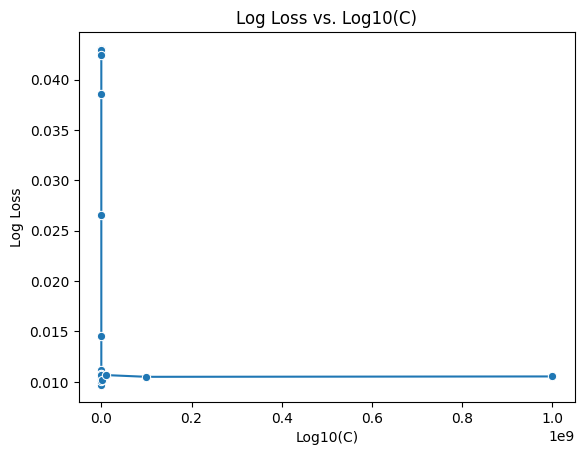

In [23]:
c_value_range_log10 = np.log10(c_value_range)
sns.lineplot(x=c_value_range, y=log_losses, marker='o')

plt.xlabel('Log10(C)')
plt.ylabel('Log Loss')
plt.title('Log Loss vs. Log10(C)')

plt.show()

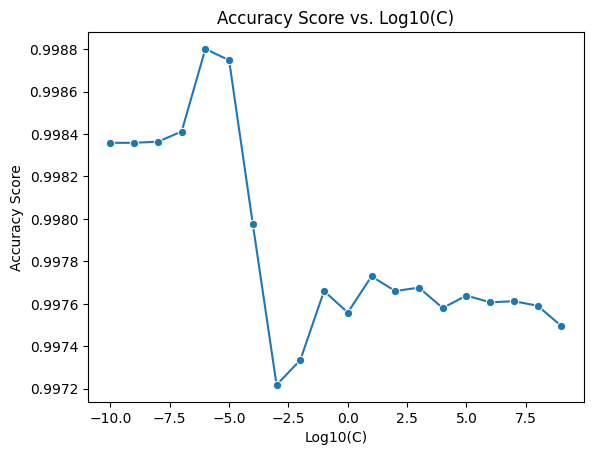

In [24]:
sns.lineplot(x=c_value_range_log10, y=accuracies, marker='o')

plt.xlabel('Log10(C)')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. Log10(C)')


plt.show()

To optimize the log loss, the value of C = 10^0 seems to yield the lowest log loss. This gives C = 1 to optimize for log loss. 

To optimize the accuracy score, the value (approximately) of C = 10^(-6) seems to yield the highest accuracy score. This gives C = 0.000001 to optimize for accuracy score. 